<a href="https://colab.research.google.com/github/apragill/github-slideshow/blob/master/5Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import statsmodels.api as sm

In [ ]:
mfr_names = { "A": "American Home Food Products", "G": "General Mills", "K": "Kelloggs",
             "N": "Nabisco", "P": "Post", "Q": "Quaker Oats", "R": "Ralston Purina" }
url = "https://gist.githubusercontent.com/ZeningQu/6184eaf8faa533e320abc938c4738c3e/raw/40f237de825061faa8721c2293b79c46979780b4/cereals.csv"
df = pd.read_csv(url)
df["mfr"].replace(mfr_names, inplace=True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25.0,3,1.0,0.33,68.40
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0.0,3,1.0,1.00,33.98
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25.0,3,1.0,0.33,59.43
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25.0,3,1.0,0.50,93.70
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25.0,3,1.0,0.75,34.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,C,110,2,1,250,0.0,21.0,3,60,25.0,3,1.0,0.75,39.11
73,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,25,25.0,2,1.0,1.00,27.75
74,Wheat Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,115,25.0,1,1.0,0.67,49.79
75,Wheaties,General Mills,C,100,3,1,200,3.0,17.0,3,110,25.0,1,1.0,1.00,51.59


**Task 1**

What are the lowest and highest rated cereals in the data set. Report these in this form:

The highest rated cereal is ___, manufactured by ___. It has a rating of ___.
The lowest rated cereal is ___, manufactured by ___. It has a rating of ___.

In [ ]:
max_rating = df["rating"].max()
print(max_rating)
cond = df["rating"] == max_rating
name2 = df[cond]["name"]
manu = df[cond]["mfr"]

print("The highest rated cereal is", name2 , "manufactured by", manu. "It has a rating of", max_rating.)

SyntaxError: ignored

In [ ]:
min_rating = df["rating"].min()
print(min_rating)
condmin = df["rating"] == min_rating
name1 = df[condmin]["name"]
man = df[condmin]["mfr"]

18.04


**Task 2** 

Display two separate horizontal bar graphs showing:

a) The average cereal rating for each manufacturer

b) The average grams of sugar for each manufacturer

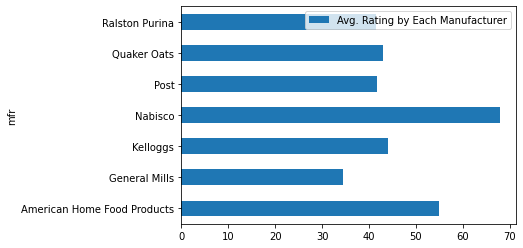

In [ ]:
df.groupby("mfr")["rating"].mean().plot.barh(label="Avg. Rating by Each Manufacturer", legend=True)


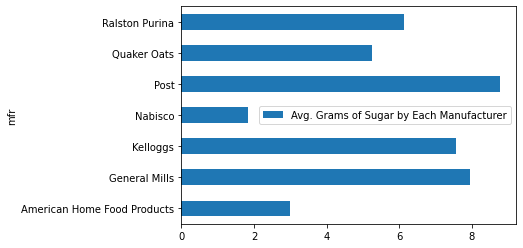

In [ ]:
df.groupby("mfr")["sugars"].mean().plot.barh(label="Avg. Grams of Sugar by Each Manufacturer", legend=True)


**Task 3** Display a histogram showing the overall distribution of ratings in the dataset.

Use these options in the command: bins=10, range=(0,100)



(array([ 0.,  2., 11., 24., 19., 13.,  5.,  2.,  0.,  1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

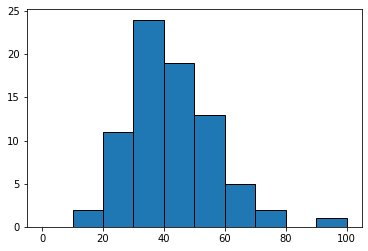

In [ ]:
plt.hist(df["rating"], bins=10,  range=(0,100), edgecolor='k')

**Task 4** 

Determine which 3 properties of the cereals are most correlated to the rating. To do that, this exact series of steps:

Select only the "rating" column, then apply .corr() and store the result into a separate variable (i.e. not df). Use this variable for each additional step.
apply a condition to select all values except 1.0
apply the .abs() command to make all the  the correlation values positive
use .sort_values() and .head() or .tail() to display the top 3 results
Beware: Make sure you find the highest 3 values and not the lowest 3.

In [ ]:
allco = df.corr()["rating"]
cond2 = allco < 1.0
# dataset[condition]
allco[cond2].abs().sort_values().tail(3)

fiber       0.584150
calories    0.689396
sugars      0.759680
Name: rating, dtype: float64

**Task 5** 

For each of the three columns determined in Task 4, apply single linear regression with stats.linregress to create a linear model with that column as the independent variable and the rating as the dependent variable. (For this and later tasks you can hard-code the names of the columns.)

Note this is NOT multiple regression in this task! Use linear regression 3 times, once with each independent variable.

Report the results of each in the following format -- shown with fake data for a pretend column named "salt"



In [ ]:
from scipy import stats

In [ ]:
reg1 = stats.linregress(df["fiber"], df["rating"])
slope, intercept, rval, p, _ = reg1
print("Model = ", intercept, "+", slope, "* fiber") 
print("R^2 = ", rval ** 2)
print("P-value = ", p)




Model =  35.25633417103267 + 3.4429225638532603 * fiber
R^2 =  0.3412317574808355
P-value =  2.4469099273262875e-08


In [ ]:
reg2 = stats.linregress(df["sugars"], df["rating"])
slope, intercept, rval, p, _ = reg2
print("Model = ", intercept, "+", slope, "* sugars") 
print("R^2 = ", rval ** 2)
print("P-value = ", p)

Model =  59.28412089813005 + -2.4008392291857654 * sugars
R^2 =  0.5771138385207082
P-value =  1.1525765639596235e-15


In [ ]:
reg3 = stats.linregress(df["calories"], df["rating"])
slope, intercept, rval, p, _ = reg3
print("Model = ", intercept, "+", slope, "* calories") 
print("R^2 = ", rval ** 2)
print("P-value = ", p)

Model =  95.78921182931222 + -0.4970278628015845 * calories
R^2 =  0.4752665137653765
P-value =  4.132124752423564e-12



**Task 6**

For the model in Task 6 with the highest R^2 value ONLY, create a plot that shows these two things together:

a) A scatter plot of all (x,y) points where the y value is the rating and the x value is the value of the independent variable

b) A straight line, which must be a different color from the points, matching the equation from the model.

Hint: You can generate a list of y values for a straight line by "doing algebra" directly on a list of x values: y_values = intercept + slope*df["..."]

In [ ]:
print("Line: ", slope, "* x +", intercept)
print("R^2: ", rval ** 2)
print("p value: ", pvalue)

plt.scatter(df["sugars"], df["rating"])
plt.plot(df["sugars"],slope*df["sugars"] + intercept, "r")
plt.show()


Line:  -0.4970278628015845 * x + 95.78921182931222
R^2:  0.4752665137653765


NameError: ignored

**Task 7**

Use multiple linear regression to create and fit a model that assumes the rating is a linear combination of the 3 variables you determined in Task 5. (Hint: Look at the Day 15 material (Links to an external site.).)

Verify that the p-value for the model overall, as well as the p-values for each coefficient, are all < 0.005. If that is not the case, you have selected the wrong 3 independent variables!

Report these to things:

The adjusted R^2 value for the model. (Do not hard code this. You need to retrieve it with code from the model. Documentation hint here (Links to an external site.).)
The equation generated by the model, which should be in this form:
rating = __ * variable1 + __ * variable2 + __ * variable3
Note some of the +s may actually be minuses, and you need to put the actual variable names in.

In [ ]:
model = sm.OLS.from_formula("rating ~ calories + sugars + fiber", df).fit()
print(model.summary())

print("Parameters:")
print(sugars_model.params)


intercept, sugars, calories, fiber = sugars_model.params
print("Rating =", intercept, "+", fiber, "+ fiber", sugars, "+ sugars", calories, "+calories")

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.1
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           7.97e-30
Time:                        18:55:15   Log-Likelihood:                -239.60
No. Observations:                  77   AIC:                             487.2
Df Residuals:                      73   BIC:                             496.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.5318      4.134     16.577      0.0

NameError: ignored